## Portfolio Project 2
### Spam Detection using Naive Byse

##### Import important modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("spam.csv")

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
## There is no null values and datatypes are also up-to-date!

In [6]:
df.shape

(5572, 2)

In [7]:
## as it's categorical dataframe, let's check ratio of spam/ham.
## this will give us some valuable insights

In [8]:
df.groupby(by = "Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

#### As I want to work with categorical data, I need to convert Spam and ham to 0 and 1.

In [9]:
df["Spam"] = df["Category"].map({"spam" : 1, "ham" : 0})

In [10]:
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [11]:
## make a copy of original dataframe as I do not need Category column.

In [12]:
df1 = df.copy()
df1.drop(labels = "Category", axis = 1, inplace =  True)

In [13]:
## Now, defining my X and y for model building.

In [14]:
X = df1["Message"]
y = df1["Spam"]

In [15]:
## split the data in train and test just to avoid overfitting

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

#### * CountVectorizer is used to transform a given text into a vector on the basis of the frequency of each word that occurs in the entire text.

In [17]:
vector = CountVectorizer()

X_train_vectorized = vector.fit_transform(X_train.values)
X_train_vectorized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
## selecting Multinimial Naive Bayes

In [1]:
clf = MultinomialNB()
clf.fit(X_train_vectorized,y_train)

NameError: name 'MultinomialNB' is not defined

In [20]:
X_test_vectorized = vector.transform(X_test.values)

In [21]:
clf.predict(X_test_vectorized)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
## Check the Score

In [23]:
clf.score(X_test_vectorized, y_test).round(3)

0.989

In [24]:
## Plot confusion matrix

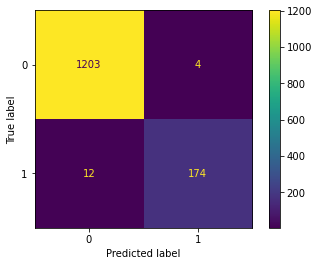

In [25]:
plot_confusion_matrix(clf, X_test_vectorized, y_test)  

plt.show()

#### Lets test the model

In [26]:
emails = ["Hey Rupen, Can we meet tommorow?", "Please, Contact customer service!"]

## "Hey Rupen, Can we meet tommorow?"- Looks normal
## "Please, Contact customer service!" - Looks like spam depending on words!

In [27]:
emails_vectorized = vector.transform(emails)

In [28]:
clf.predict(emails_vectorized)

array([0, 1], dtype=int64)

#### from sklearn.naive_bayes import GaussianNB - today's point  gaussian naive bayes, use when continuous data
#### from sklearn.naive_bayes import MultinomialNB - use when data are descreate or text count form
#### from sklearn.naive_bayes import BernoulliNB - use when all the features are in binary form